In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(35) # Semilla para replicar datos
random_xy = np.random.randint(low=100,high=200,size=(100,2))

In [3]:
# Esto sera útil mas adelante. Visualicemos los indices del arreglo del 0 al 10
print(random_xy[[0,1,2,3,4,5,6,7,8,9]])

[[173 115]
 [155 133]
 [163 164]
 [111 111]
 [156 172]
 [157 155]
 [194 144]
 [191 155]
 [156 164]
 [176 161]]


[Text(0.5, 1.0, 'Simulando puntos aleatoriamente con numpy')]

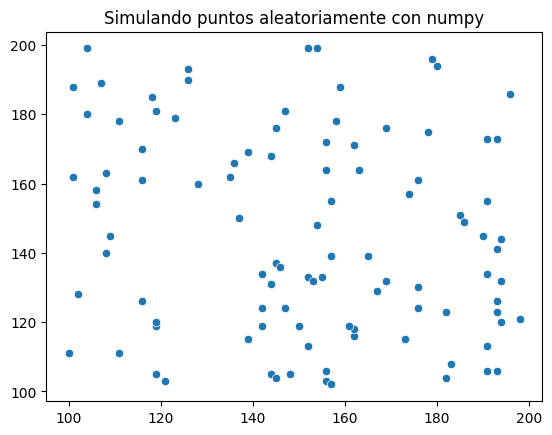

In [4]:
sns.scatterplot(x = random_xy[:,0],y=random_xy[:,1]).set(title="Simulando puntos aleatoriamente con numpy")

In [5]:
min_x = np.amin(random_xy,axis=0)
max_x = np.amax(random_xy,axis=0)

n_xy = random_xy.shape[1]
k_cluster = 3


print(f"El conjunto de datos tiene {n_xy} variables.\nValor minimo para valores de x es {min_x} y el maximo valor para valores de x es {max_x}")
centroids_random = np.random.uniform(low=min_x,high=max_x,size=(k_cluster,n_xy))
print(f"Los centroides iniciales son:\n{centroids_random}")

El conjunto de datos tiene 2 variables.
Valor minimo para valores de x es [100 102] y el maximo valor para valores de x es [198 199]
Los centroides iniciales son:
[[192.19368099 157.89882419]
 [162.22124085 129.30735178]
 [173.25582553 161.41782275]]


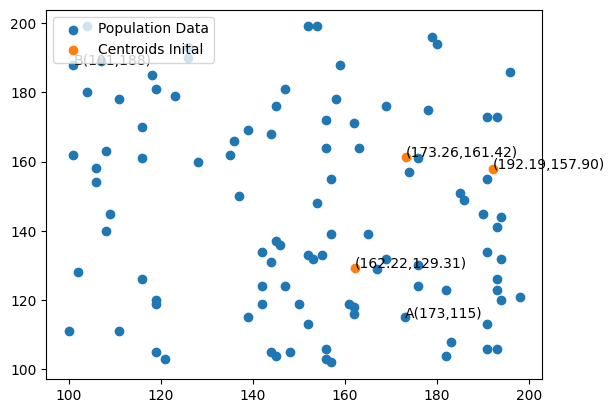

In [6]:
plt.scatter(x = random_xy[:,0],y=random_xy[:,1],label="Population Data")
plt.scatter(x = centroids_random[:,0],y=centroids_random[:,1],label = "Centroids Inital")
plt.text(x=random_xy[0][0],y=random_xy[0][1],s=f"A({random_xy[0][0]:},{random_xy[0][1]})")
plt.text(x=random_xy[-1][0],y=random_xy[-1][1],s=f"B({random_xy[-1][0]},{random_xy[-1][1]})")
plt.text(x=centroids_random[0][0],y=centroids_random[0][1],s=f"({centroids_random[0][0]:.2f},{centroids_random[0][1]:.2f})")
plt.text(x=centroids_random[1][0],y=centroids_random[1][1],s=f"({centroids_random[1][0]:.2f},{centroids_random[1][1]:.2f})")
plt.text(x=centroids_random[2][0],y=centroids_random[2][1],s=f"({centroids_random[2][0]:.2f},{centroids_random[2][1]:.2f})")

plt.legend(loc='upper left')

In [7]:
def euclidean_dist(data_points,centroids):
    return np.sqrt(np.sum((data_points-centroids)**2,axis=1))

In [8]:
# Calculamos la distancia euclidiana para cada punto con cada cluster aleatorio
all_dist = []
for data_point in random_xy:
    dist_xy_cent = euclidean_dist(data_point,centroids_random)
    all_dist.append(np.argmin(dist_xy_cent)) # Guardamos la etiqueta del centroide con la distancia minima

all_dist = np.array(all_dist)

In [9]:
# Etiqueta a cada punto con un cluster dada la distancia minima entre ambos
all_dist

array([1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2,
       1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2], dtype=int64)

In [10]:
indices_cluster = []
for i in range(k_cluster):
    # Guarda los indices que le corresponde a cada punto del dataset (Junta los datos en cada conjunto)
    indices_cluster.append(np.argwhere(all_dist==i))

In [11]:
# Observemos como para esta primera lista los indices corresponden a la posicion del arreglo *all_dist* donde el valor es 0
# Posición 7,11,13,... para el grupo 0
# Posición 2,9,10,... para el grupo 1
# Posición 0,1,3,... para el grupo 2
indices_cluster[0][0:5]

array([[ 6],
       [ 7],
       [19],
       [24],
       [36]], dtype=int64)

In [12]:
new_centroids = []

for i,indices in enumerate(indices_cluster):
    if len(indices) == 0:
        new_centroids.append(centroids_random[i])
    else:
        new_centroids.append(np.mean(random_xy[indices],axis=0)[0])

In [13]:
# Comparemos el nuevo cluster con los iniciales

print(centroids_random)
print(new_centroids)

[[192.19368099 157.89882419]
 [162.22124085 129.30735178]
 [173.25582553 161.41782275]]
[array([191.27272727, 153.        ]), array([148.83928571, 124.82142857]), array([142.48484848, 177.66666667])]


Aqui podemos seguir iterando hasta una iteración máxima o que la diferencia del i-esimo cluster sea menor a un umbral dado.

Implementemos una clase que lo cálcule

In [14]:
class kmeans_algorithm:
    def __init__(self, k = 3):
        self.k = k
        self.centroids = None
    
    def euclidean_dist(array_points,centroids): # Función de la distancia euclidiana con numpy
        return np.sqrt(np.sum((array_points-centroids)**2,axis=1))
    
    def fit_data(self, data_points, max_iterations = 300, error_tol = 0.0001):

        self.centroids = np.random.uniform(low=np.amin(data_points,axis=0),
                                           high=np.amax(data_points,axis=0),
                                           size=(self.k,data_points.shape[1]))
        
        # Calculamos la distancia euclidiana para cada punto con cada cluster aleatorio

        for iter_i in range(max_iterations):

            # Todas las distancias minimas por agrupación
            all_dist = np.array([np.argmin(euclidean_dist(every_point,self.centroids)) for every_point in data_points])

            # Agreguemos en una lista los indices de cada grupo de datos asignados en el paso anterior
            cluster_index = [np.argwhere(all_dist == group_i) for group_i in range(self.k)]

            # Guardemos en una variable los clusters en cada iteración.
            # Nota: no es necesario almacenarlos, sin embargo para temas prácticos se hara así
            updt_centroids = []
            for i,cluster_i_index in enumerate(cluster_index):
                if len(cluster_i_index) == 0:
                    updt_centroids.append(self.centroids[i])
                else:
                    updt_centroids.append(np.mean(data_points[cluster_i_index],axis=0)[0])
            
            if np.max(self.centroids - np.array(updt_centroids)) < error_tol:
                print(f"El algortimo convergio en la iteración {iter_i}")
                break
            else:
                self.centroids = np.array(updt_centroids)
        return all_dist

In [15]:
# Veamos que tal quedo la implementación

kmeans_manual = kmeans_algorithm(k=3)
centroids_final = kmeans_manual.fit_data(data_points=random_xy,max_iterations=300,error_tol=0.00001)

El algortimo convergio en la iteración 4


In [16]:
centroids_final

array([2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0,
       1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0], dtype=int64)

In [17]:
kmeans_manual.centroids

array([[132.48571429, 175.54285714],
       [136.11111111, 118.7037037 ],
       [179.71052632, 136.5       ]])

[Text(0.5, 1.0, 'Cluster calculados manualmente')]

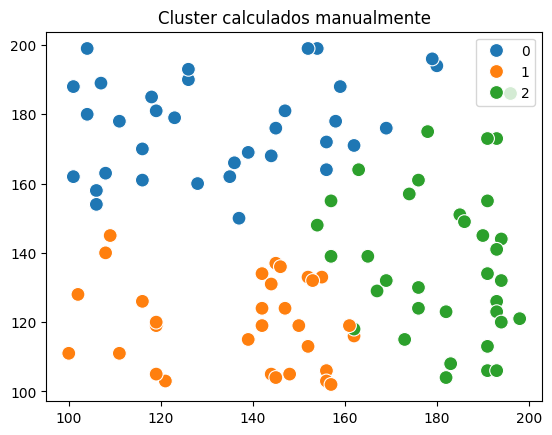

In [18]:
sns.scatterplot(x=random_xy[:,0],y=random_xy[:,1],hue=centroids_final,palette="tab10",s=100).set(title = "Cluster calculados manualmente")

Veamos como lo hace la libreria de Scikit learn

In [19]:
from sklearn.cluster import KMeans

cluster_result = KMeans(n_clusters = 3).fit(random_xy)
cluster_result_cent = cluster_result.cluster_centers_
print(f"Los centroides son:\n{cluster_result_cent}")
cluster_result_labels = cluster_result.labels_
print(f"Las etiquetas son:\n{cluster_result_labels}")

Los centroides son:
[[185.26666667 136.5       ]
 [133.97297297 174.67567568]
 [140.18181818 120.54545455]]
Las etiquetas son:
[0 2 1 2 1 1 0 0 1 0 2 2 1 1 1 2 1 1 0 0 2 1 2 2 0 2 0 1 2 1 1 2 0 2 0 0 0
 0 2 1 1 1 1 2 2 1 2 0 1 0 1 0 1 2 1 2 0 2 0 2 0 1 1 1 1 2 0 2 1 0 2 0 0 1
 2 2 2 2 1 0 1 0 2 2 1 2 1 1 2 1 2 2 0 1 0 0 1 0 0 1]


c:\Users\aleja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[Text(0.5, 1.0, 'Usando Sklearn')]

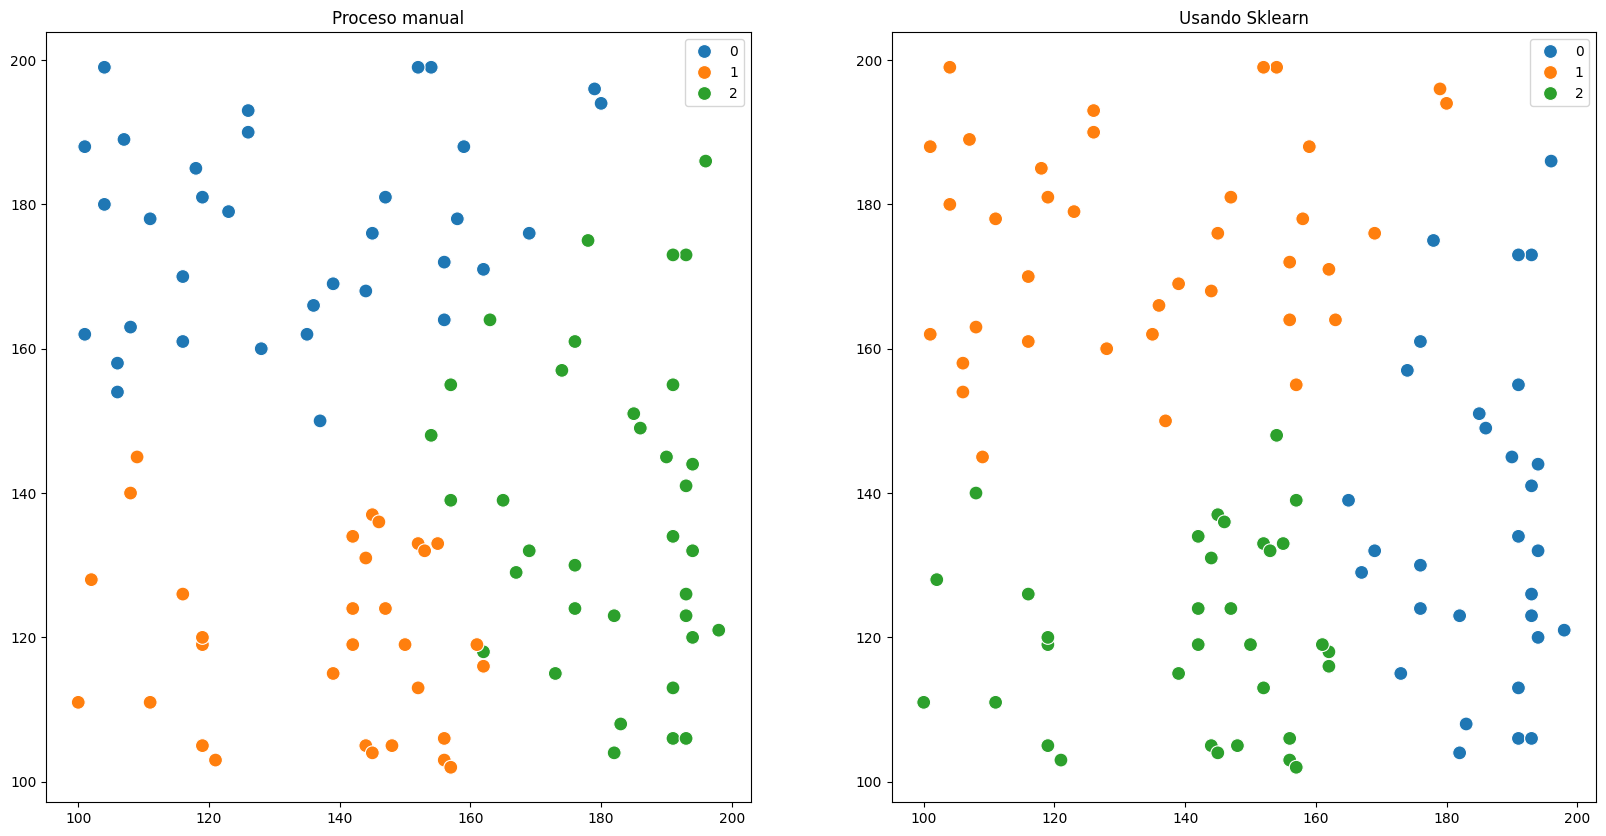

In [20]:
# Comparemos ambosa resultados

fig, axs = plt.subplots(ncols=2,figsize=(20, 10))

sns.scatterplot(x=random_xy[:,0],y=random_xy[:,1],hue=centroids_final,ax=axs[0],palette="tab10",s=100).set(title="Proceso manual")
sns.scatterplot(x=random_xy[:,0],y=random_xy[:,1],hue=cluster_result_labels,ax=axs[1],palette="tab10",s=100).set(title="Usando Sklearn")

El algortimo convergio en la iteración 2


c:\Users\aleja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[Text(0.5, 1.0, 'Usando Sklearn')]

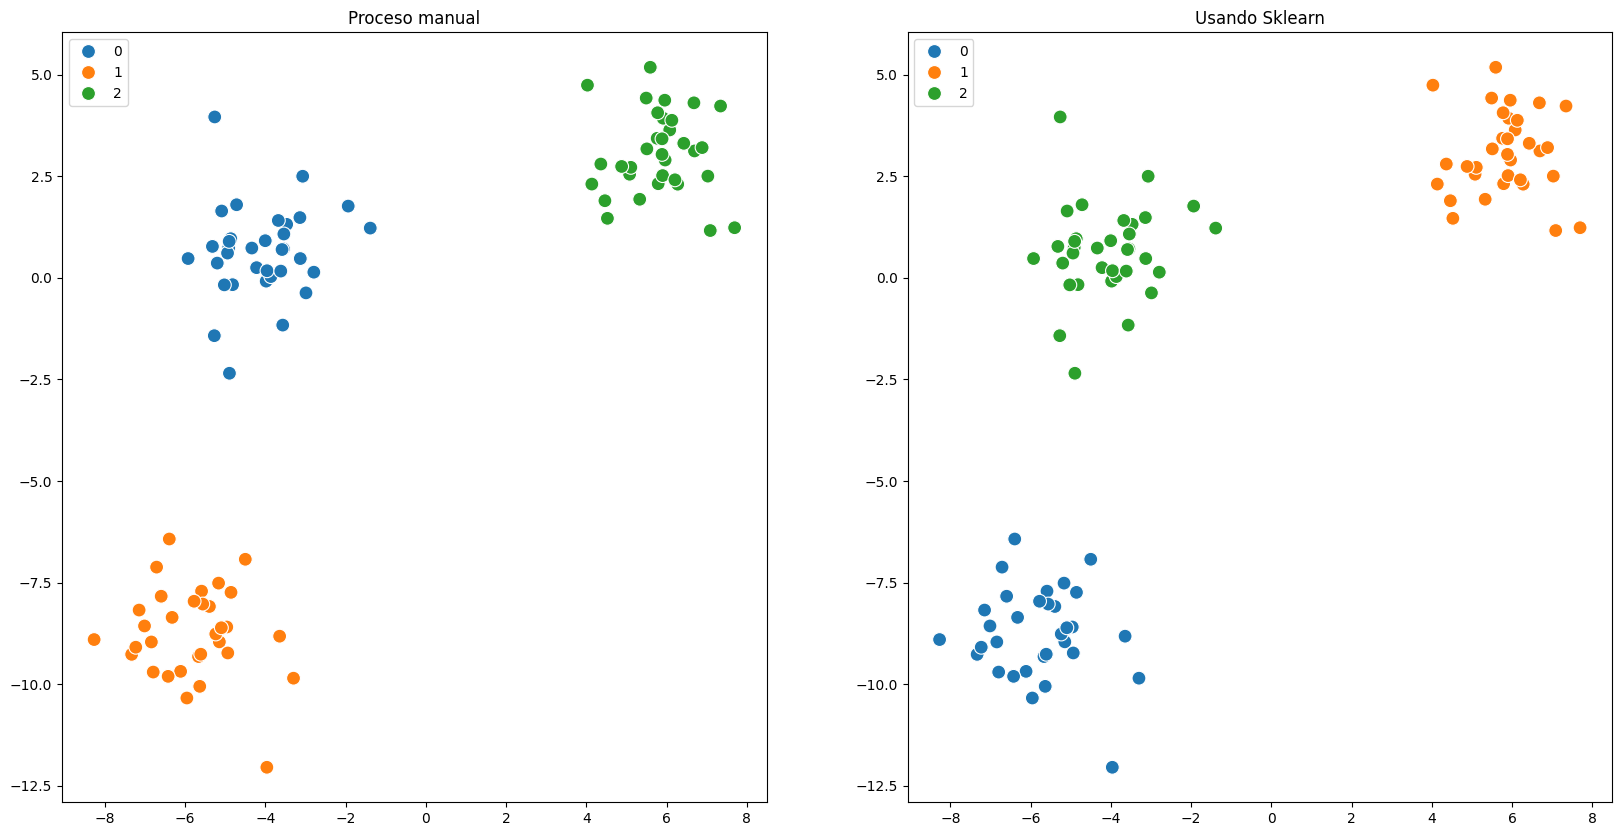

In [21]:
from sklearn.datasets import make_blobs

points_xy,group_xy= make_blobs(n_samples=100,centers = 3,n_features=2,random_state=17)


kmeans_manual = kmeans_algorithm(k=3)
centroids_final = kmeans_manual.fit_data(data_points=points_xy,max_iterations=300,error_tol=0.00001)

cluster_result = KMeans(n_clusters = 3).fit(points_xy)
cluster_result_cent = cluster_result.cluster_centers_
cluster_result_labels = cluster_result.labels_



fig, axs = plt.subplots(ncols=2,figsize=(20, 10))

sns.scatterplot(x=points_xy[:,0],y=points_xy[:,1],hue=centroids_final,ax=axs[0],palette="tab10",s=100).set(title="Proceso manual")
sns.scatterplot(x=points_xy[:,0],y=points_xy[:,1],hue=cluster_result_labels,ax=axs[1],palette="tab10",s=100).set(title="Usando Sklearn")

In [22]:
kmeans_manual.centroids

array([[-4.08634243,  0.63319293],
       [-5.76626289, -8.73590274],
       [ 5.81439531,  3.06549065]])